# Speed Dating

## Challenge description

We will start a new data visualization and exploration project. Your goal will be to try to understand *love*! It's a very complicated subject so we've simplified it. Your goal is going to be to understand what happens during a speed dating and especially to understand what will influence the obtaining of a **second date**.

This is a Kaggle competition on which you can find more details here :

[Speed Dating Dataset](https://www.kaggle.com/annavictoria/speed-dating-experiment#Speed%20Dating%20Data%20Key.doc)

Take some time to read the description of the challenge and try to understand each of the variables in the dataset. Help yourself with this from the document : *Speed Dating - Variable Description.md*

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go

In [4]:
dataset = pd.read_csv("Speed Dating Data.csv", encoding='ISO-8859-1')

In [5]:
dataset.shape

(8378, 195)

In [6]:
pd.set_option('display.max_columns', None)
dataset.describe(include = "all")

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8315,8296.000000,4914,3133,3583,8315.000000,8299.000000,8299.000000,8299,7314,4279,8299.000000,8281.000000,8299.000000,8289,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6467.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,8003.000000,7205.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,7463.000000,7463.000000,7433.000000,1984.000000,1955.000000,1984.000000,1984.000000,1955.000000,1974.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.00000,5775.000000,5775.000000,5775.000000,5775.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259,NaN,241,68,115,NaN,NaN,NaN,269,409,261,NaN,NaN,NaN,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [7]:
dataset.head(12)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.00,20.00,20.00,20.00,0.00,5.00,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.00,0.00,0.00,40.00,0.00,0.00,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.00,18.00,19.00,18.00,14.00,12.00,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.00,5.00,15.00,40.00,5.00,

In [8]:
missing = 100 * dataset.isna().sum() / dataset.shape[0]
print(missing.sort_values(ascending = False))

num_in_3    92.026737
numdat_3    82.143710
expnum      78.515159
sinc7_2     76.665075
amb7_2      76.665075
              ...    
wave         0.000000
condtn       0.000000
idg          0.000000
gender       0.000000
dec          0.000000
Length: 195, dtype: float64


Description of participants

In [9]:
# gender : Female = 0 , Male = 1
dataset['gender'] = dataset['gender'].map({ 0 : "Female", 1 : "Male"})
# race of partner :
#   Black/African American=1
#	European/Caucasian-American=2
#	Latino/Hispanic American=3
#	Asian/Pacific Islander/Asian-American=4
#	Native American=5
#	Other=6
dataset['race'] = dataset['race'].map({ 1 : "Black/African",
                                        2 : "European/Caucasian",
                                        3 : "Latino/Hispanic",
                                        4 : "Asian/Pacific Islander/Asian",
                                        5 : "Native",
                                        6 : "Other"})
# match : 1 = yes, 0 = no
dataset['match'] =dataset['match'].map({ 0 : "No", 1 : "Yes"})
# 1= yes, 0=no
dataset['samerace'] = dataset['samerace'].map({ 0 : "No", 1 : "Yes"})

In [10]:
print('number of participants : ', len(dataset['iid'].unique()))
print('number of waves : ', len(dataset['wave'].unique()))

number of participants :  551
number of waves :  21


In [11]:
pd.set_option('display.max_rows',10)
df_ind = dataset.groupby('iid')[['gender', 'age', 'race', 'wave',
                        'attr1_1','sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1',
                        'attr4_1','sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1',
                        'attr2_1','sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1' ]].head(1).reset_index(drop=True)

In [12]:
df_ind

,gender,age,race,wave,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1
0,Female,21.0,Asian/Pacific Islander/Asian,1,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0
1,Female,24.0,European/Caucasian,1,45.0,5.0,25.0,20.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,65.0,0.0,10.0,25.0,0.0,0.0
2,Female,25.0,European/Caucasian,1,35.0,10.0,35.0,10.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,0.0,20.0,30.0,0.0,0.0
3,Female,23.0,European/Caucasian,1,20.0,20.0,20.0,20.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,30.0,10.0,15.0,30.0,5.0,10.0
4,Female,21.0,European/Caucasian,1,20.0,5.0,25.0,25.0,10.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,10.0,10.0,20.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,Male,30.0,European/Caucasian,21,40.0,10.0,20.0,10.0,0.0,20.0,60.0,0.0,0.0,20.0,0.0,20.0,30.0,20.0,20.0,0.0,10.0,20.0
547,Male,28.0,European/Caucasian,21,20.0,20.0,20.0,20.0,0.0,20.0,50.0,10.0,5.0,20.0,5.0,10.0,35.0,10.0,10.0,15.0,20.0,10.0
548,Male,30.0,European/Caucasian,21,30.0,3.0,30.0,30.0,3.0,4.0,30.0,3.0,30.0,30.0,3.0,4.0,20.0,3.0,30.0,30.0,13.0,4.0
549,Male,27.0,Black/African,21,40.0,20.0,20.0,20.0,0.0,0.0,25.0,5.0,20.0,20.0,15.0,15.0,60.0,0.0,0.0,40.0,0.0,0.0


Male      277
Female    274
Name: gender, dtype: int64


[Text(0.5, 1.0, 'the frequency table of gender')]

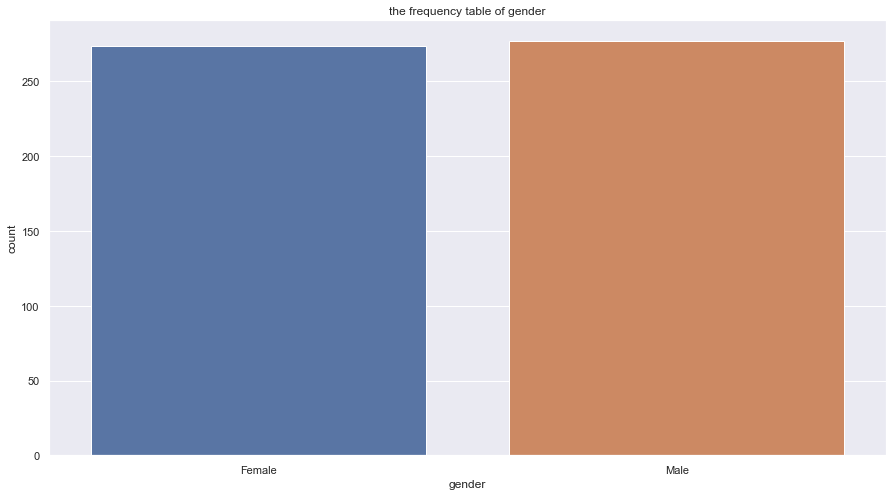

In [20]:
sns.set(rc = {'figure.figsize':(15,8)})

print(df_ind['gender'].value_counts())
sns.countplot(data = df_ind , x ='gender').set(title = "the frequency table of gender")

count    543.000000
mean      26.359116
std        3.766960
min       18.000000
25%       24.000000
50%       26.000000
75%       28.000000
max       55.000000
Name: age, dtype: float64


Text(0.5, 1.0, 'boxplot for age')

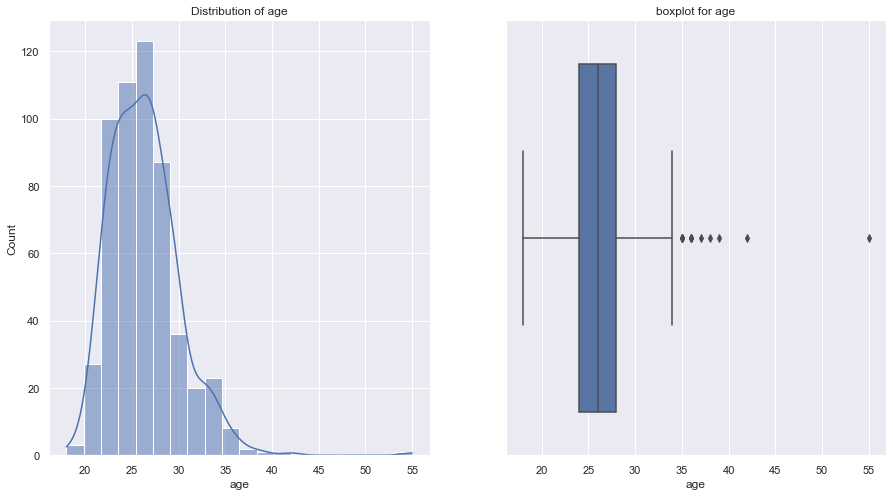

In [21]:
# Distribution of age
print(df_ind['age'].describe())

fig, axs = plt.subplots(ncols=2)
sns.histplot(data = df_ind , x = 'age', kde=True, bins= 20, ax = axs[0])
sns.boxplot(data = df_ind , x = 'age', ax = axs[1])

# Adding titles to subplots
axs[0].set_title('Distribution of age')
axs[1].set_title('boxplot for age')


[Text(0.5, 1.0, 'the frequency table of the different race')]

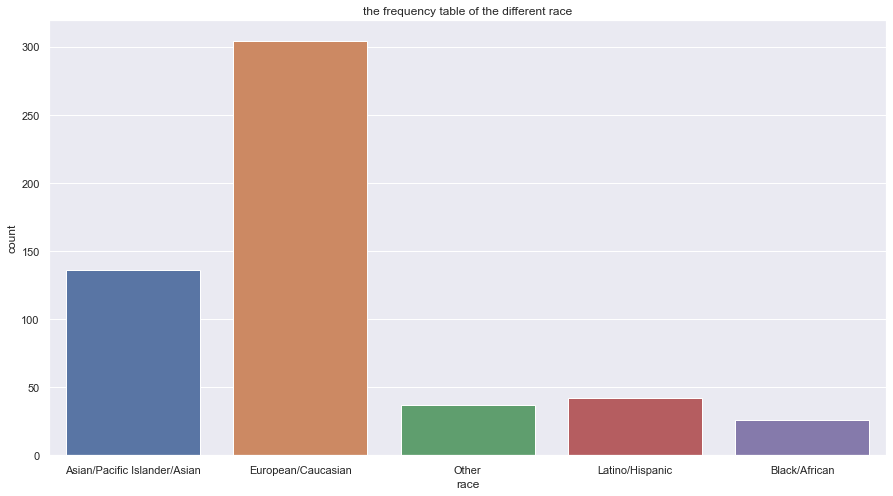

In [22]:
sns.countplot(data = df_ind, x = 'race').set(title = "the frequency table of the different race")

[Text(0.5, 1.0, 'the participant number by wave')]

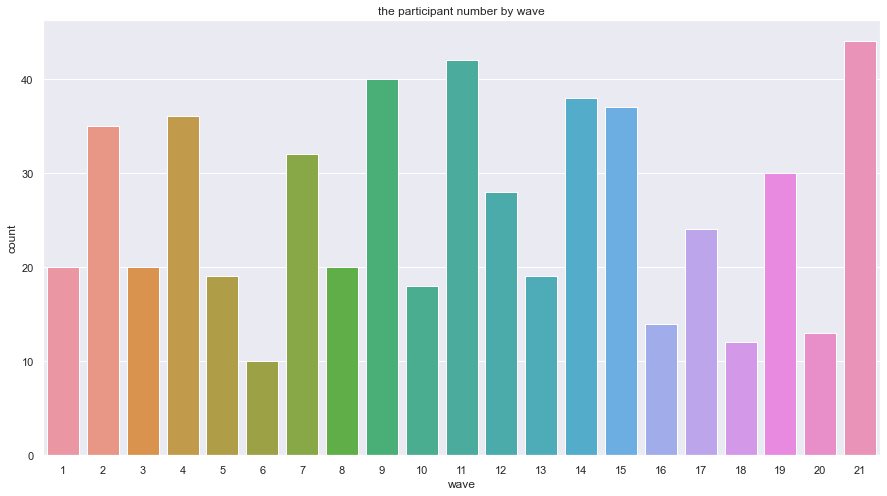

In [23]:
sns.countplot(data = df_ind, x = 'wave').set(title = 'the participant number by wave')

# Statistics before the event :
look for in the opposite sex and think the opposite sex looks for in a date

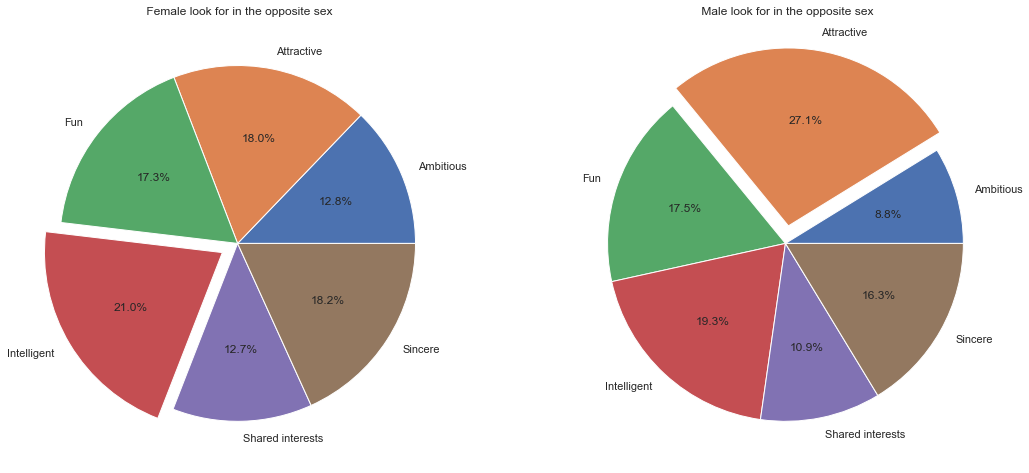

In [24]:
# look for in the opposite sex
look = df_ind.groupby(['gender'])[['attr1_1','sinc1_1', 'intel1_1',
                                     'fun1_1', 'amb1_1', 'shar1_1']].mean().reset_index()
data = pd.pivot_table(look, values = ['attr1_1','sinc1_1', 'intel1_1',
                                     'fun1_1', 'amb1_1', 'shar1_1'], columns = 'gender')
labels = ['Ambitious','Attractive', 'Fun', 'Intelligent','Shared interests','Sincere']
plt.figure(figsize=(18,18))
plt.subplot(221)
plt.pie(data['Female'] ,labels = labels, explode = (0, 0, 0, 0.1 ,0, 0), autopct='%1.1f%%')
plt.title(" Female look for in the opposite sex")
# look for in the opposite sex
plt.subplot(222)
plt.pie(data['Male'] ,labels = labels, explode = (0, 0.1, 0, 0,0, 0), autopct='%1.1f%%')
plt.title(" Male look for in the opposite sex")
plt.show()

* Male : looks especially for the attribute : attractive
* Female : it is balanced between the following attributes : Intelligent, Sincere, Attractive, Fun
* Attributes Shared interests and Ambitious are the least desirable for Female et Male

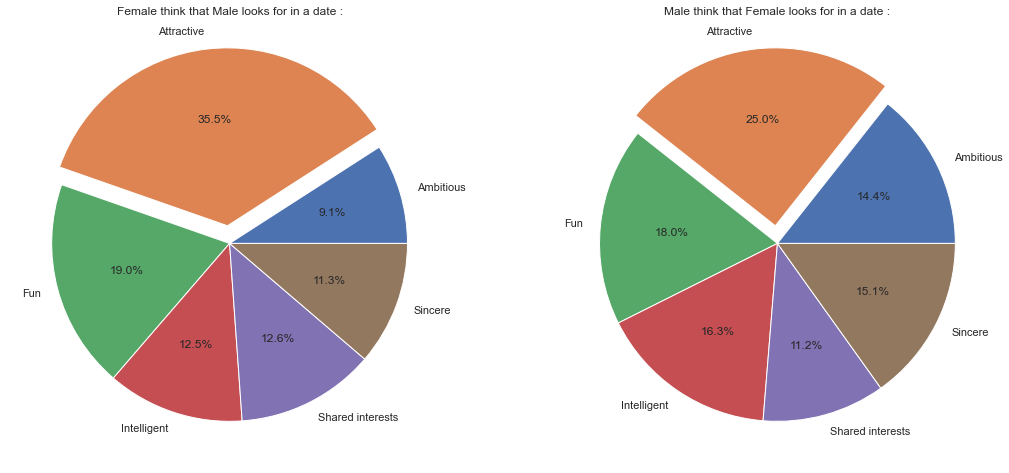

In [25]:
# What do you think the opposite sex looks for in a date
think_other_date = df_ind.groupby(['gender'])[['attr2_1','sinc2_1', 'intel2_1',
                                                'fun2_1', 'amb2_1', 'shar2_1']].mean().reset_index()
data_o_date = pd.pivot_table(think_other_date , values = ['attr2_1','sinc2_1', 'intel2_1',
                                                'fun2_1', 'amb2_1', 'shar2_1'], columns = 'gender')

labels = ['Ambitious','Attractive', 'Fun', 'Intelligent','Shared interests','Sincere']
plt.figure(figsize=(18,18))
plt.subplot(221)
plt.pie(data_o_date['Female'] ,labels = labels, explode = (0, 0.1, 0, 0 ,0, 0), autopct='%1.1f%%')
plt.title("Female think that Male looks for in a date :")
# look for in the opposite sex
plt.subplot(222)
plt.pie(data_o_date['Male'] ,labels = labels, explode = (0, 0.1, 0, 0,0, 0), autopct='%1.1f%%')
plt.title("Male think that Female looks for in a date :")
plt.show()

* The both think most of your fellow look for in the attribute Attractive but with 35,5% for female vs 25,0% for male.
* Female think that male don't look Ambitious, Sincere, Intelligent and Shared interests.
* Male think that male don't look Shared interests.

# Speed Dating : the decision the night of event

0    0.580091
1    0.419909
Name: dec, dtype: float64


<AxesSubplot:xlabel='dec', ylabel='count'>

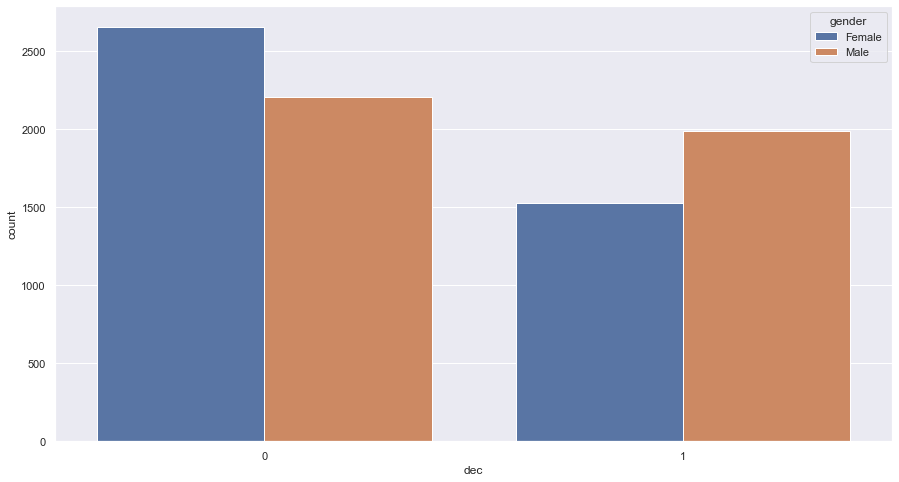

In [28]:
print(dataset['dec'].value_counts()/dataset['dec'].shape[0])
sns.countplot(data = dataset, x ='dec', hue='gender')

Text(0.5, 1.0, 'correlation between decision and rating by participant')

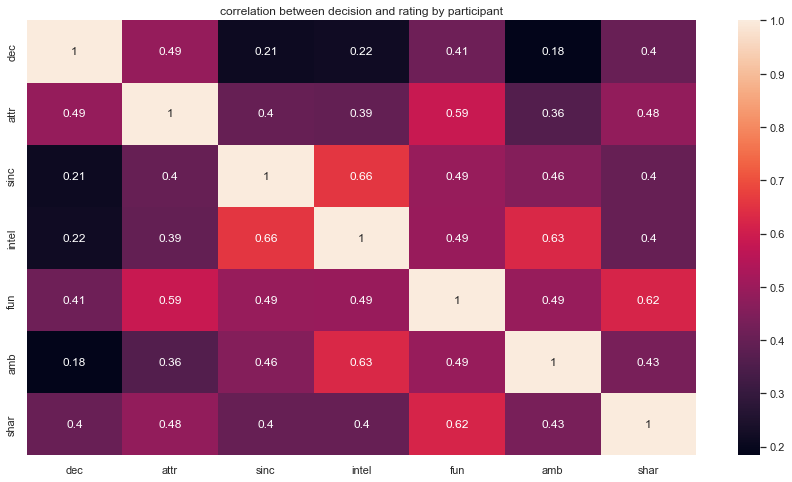

In [27]:
df_corr = dataset[['dec', 'attr','sinc','intel','fun','amb','shar']].corr()
f, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(df_corr, annot=True, ax=ax)
plt.title("correlation between decision and rating by participant")

The correlation matrix shows that the attributes: Attractive (0.49), fun (0.41) and Shared interests (0.4) are the most discriminating in determining decision making.

In [19]:
dataset['dec']  = dataset['dec'].map({ 0 : "No", 1 : "Yes"})

In [20]:
# analysis scorecard Female
df_female = dataset[dataset['gender']=='Female']

fig = go.Figure()
fig.add_trace(go.Box(
    x = df_female['dec'],
    y = df_female['attr'],
    name = 'Attractive',
    boxmean = True,
    marker_color = '#EB89B5',
    opacity = 0.75
))
fig.add_trace(go.Box(
    x = df_female['dec'],
    y = df_female['sinc'],
    name = 'Sincere',
    boxmean = True,
    marker_color = '#00CC96',
    opacity = 0.75
))
fig.add_trace(go.Box(
    x = df_female['dec'],
    y = df_female['intel'],
    name = 'Intelligent',
    boxmean = True,
    marker_color = '#AB63FA',
    opacity = 0.75
))
fig.add_trace(go.Box(
    x = df_female['dec'],
    y = df_female['fun'],
    name = 'Fun',
    boxmean = True,
    marker_color = '#FFA15A',
    opacity = 0.75
))
fig.add_trace(go.Box(
    x = df_female['dec'],
    y = df_female['amb'],
    name = 'Ambitious',
    boxmean = True,
    marker_color ='#FF4136',
    opacity = 0.75
))
fig.add_trace(go.Box(
    x = df_female['dec'],
    y = df_female['shar'],
    boxmean = True,
    name = 'Shared interests',
    marker_color = '#B6E880',
    opacity = 0.75
))

fig.update_layout(
    title_text = 'Female : Rating attributes by decision', # title of plot
    xaxis_title_text = 'decision', # xaxis label
    yaxis_title_text = 'Rating', # yaxis label
    boxmode = 'group'
)

fig.show()

* For female, the scores are higher for the attributes "Sincere", "Intelligent" in the case of yes with a median equal to 8.
* But the biggest differences between "yes" and "no" are for the attributes "Attractive", "fun", "Shared interests" (on average).

In [21]:
# analysis scorecard Male
df_male = dataset[dataset['gender']=='Male']

fig = go.Figure()
fig.add_trace(go.Box(
    x = df_male['dec'],
    y = df_male['attr'],
    
    name = 'Attractive', 
    marker_color = '#EB89B5',
    opacity = 0.75
))
fig.add_trace(go.Box(
    x = df_male['dec'],
    y = df_male['sinc'],
    name = 'Sincere',
    marker_color = '#00CC96',
    opacity = 0.75
))
fig.add_trace(go.Box(
    x = df_male['dec'],
    y = df_male['intel'],
    name = 'Intelligent',
    marker_color = '#AB63FA',
    opacity = 0.75
))
fig.add_trace(go.Box(
    x = df_male['dec'],
    y = df_male['fun'],
    name = 'Fun',
    marker_color = '#FFA15A',
    opacity = 0.75
))
fig.add_trace(go.Box(
    x = df_male['dec'],
    y = df_male['amb'],
    name = 'Ambitious',
    marker_color ='#FF4136',
    opacity = 0.75
))
fig.add_trace(go.Box(
    x = df_male['dec'],
    y = df_male['shar'],
    name = 'Shared interests',
    marker_color = '#B6E880',
    opacity = 0.75
))

fig.update_layout(
    title_text = 'Male : Rating attributes by decision', # title of plot
    xaxis_title_text = 'decision', # xaxis label
    yaxis_title_text = 'Rating', # yaxis label
    boxmode = 'group'
)

fig.show()

* For male, in the case of yes, the scores are relatively identical but slightly higher for Sincere and Intelligent.
* In the case of no,the highest scores are also for the attributes "Sincere" and "Intelligent".
* The lowest are for attribute "Shared interests".

In [45]:
fig = px.box(dataset, 
            x = "dec",
            y = "exphappy",
            color = 'gender',
            title = "decision based on happy expect to be with the people you meet by gender"
            )
fig.show()

Women are more likely to say yes if they come to be happy with the people you meet during the speed-dating event

In [46]:
fig = px.box(dataset, 
            x = "dec_o",
            y = "prob",
            color = 'gender',
            title = "Evaluates the probability that the partner will say 'yes' by gender"
            )
fig.show()

Men are better than women at assessing the likelihood of the person saying yes (median 6 vs 5)

# Speed dating : the match

In [49]:
dataset['match'] =dataset['match'].map({ 0 : "No", 1 : "Yes"})

No     0.835283
Yes    0.164717
Name: match, dtype: float64


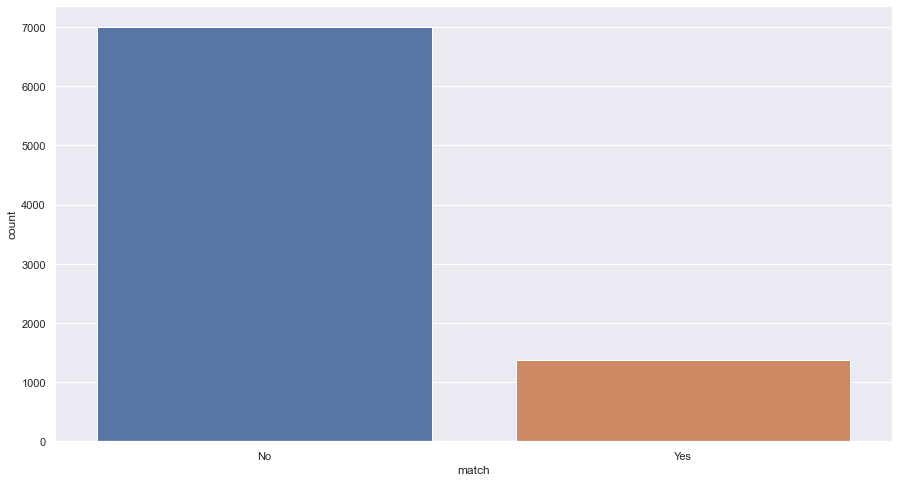

In [50]:
sns.countplot(data = dataset, x ='match')
print(dataset['match'].value_counts()/dataset['match'].shape[0])

39.0 % of positive decisions result in a match


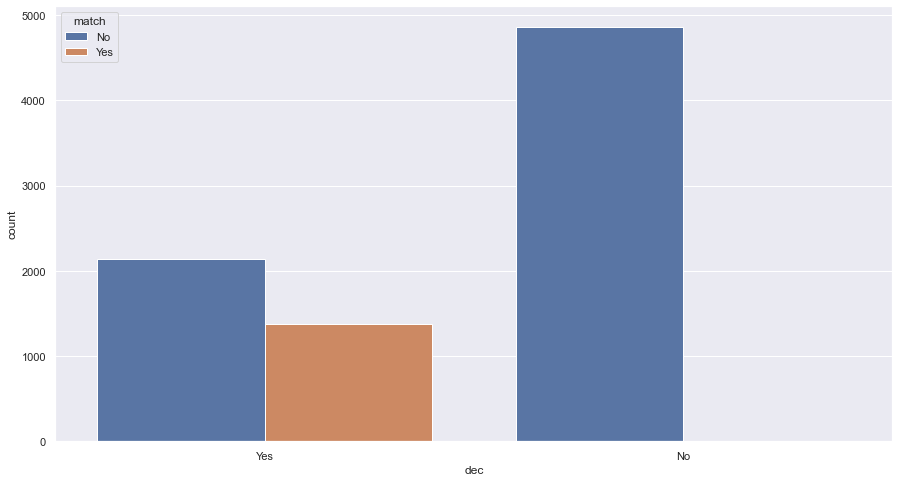

In [51]:
sns.countplot(data = dataset, x ='dec', hue ='match')
mask = dataset['dec']=="Yes"
stat = dataset.loc[mask, 'match'].value_counts()/dataset.loc[mask, 'match'].shape[0]
print(f'{round(100 * stat[1],0)} % of positive decisions result in a match')

In [52]:
fig = px.histogram(dataset,
                    x = "samerace",
                    color = "match",
                    facet_col = 'gender',
                    marginal="box",
                    title = "match by gender and same race in %",
                    )
fig.show()

No influence

In [53]:
fig = px.histogram(dataset,
                    x = "int_corr",
                    color = "match",
                    facet_col = 'gender',
                    marginal="box",
                    nbins = 20,
                    title = "match by gender and correlation between participant’s and partner’s ratings of interests",
                    )
fig.show()

Has shared interests/hobbies promotes the match for women/men

In [54]:
fig = px.histogram(dataset,
                    x = "order",
                    color = "match",
                    facet_col = 'gender',
                    marginal="box",
                    nbins = 20,
                    title = "match by gender and the number order of date that night when met partner",
                    )
fig.show()

No influence

# The seconde date

In [29]:
dataset['match'] =dataset['match'].map({ "No" : 0, "Yes" : 1})
df_ind_date = dataset.groupby(['iid', 'gender']).agg({'you_call': 'first', 'them_cal':'first',
                                                         'date_3':'first', 'match' : 'sum'}).reset_index()
df_ind_date.dropna(inplace=True)
print(f'There are only {len(df_ind_date)} responses.')

There are only 263 responses.


[Text(0.5, 1.0, 'the second date')]

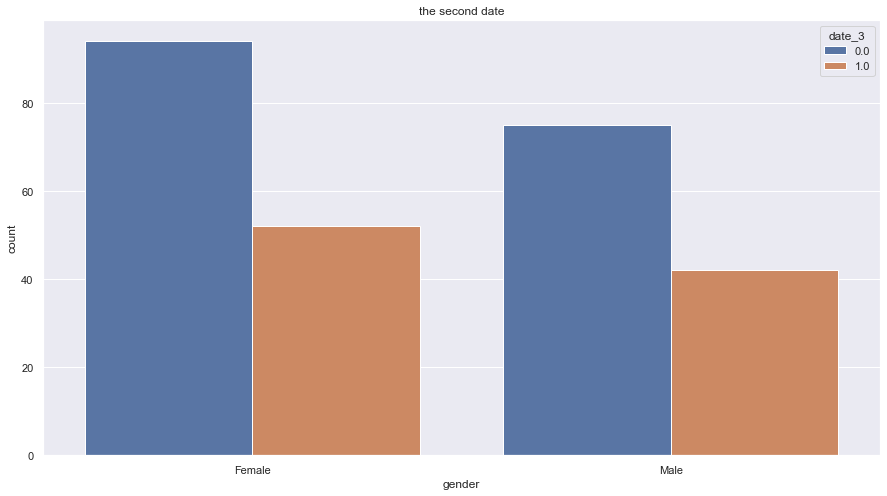

In [31]:
sns.countplot(data = df_ind_date, x = 'gender', hue= 'date_3').set(title = "the second date")

Text(0.5, 1.0, 'correlation with the second date (date_3)')

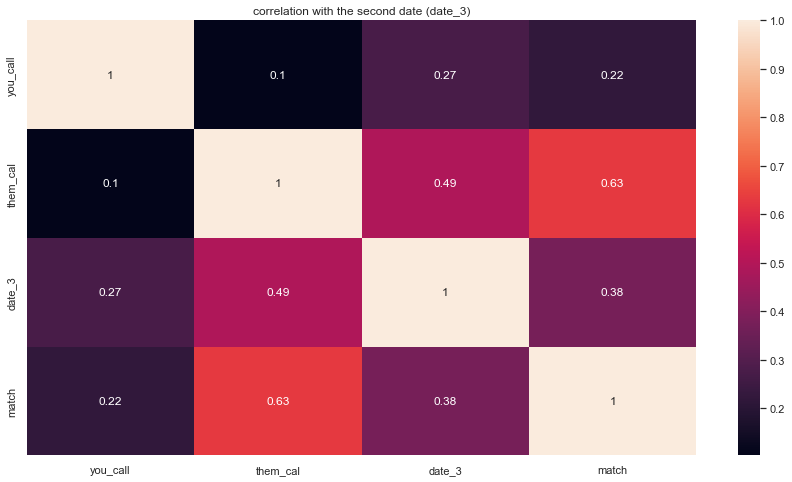

In [33]:
df_corr_date = df_ind_date.corr()[['you_call', 'them_cal', 'date_3', 'match']]
f, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(df_corr_date[1:], annot=True, ax=ax)
plt.title("correlation with the second date (date_3)")

In [35]:
df_ind_date['date_3'] = df_ind_date['date_3'].map({ 0 : "No", 1 : "Yes"})
fig = px.histogram(df_ind_date,
                    x = "you_call",
                    color = "date_3",
                    facet_col = 'gender',
                    marginal="box",
                    title = "second date in function number you call by gender",
                    )
fig.show()

In [36]:
fig = px.histogram(df_ind_date,
                    x = "them_cal",
                    color = "date_3",
                    facet_col = 'gender',
                    marginal="box",
                    title = "second date in function number them call by gender",
                    )
fig.show()

* calls allow for a second date
* men call more than women

In [37]:
fig = px.histogram(df_ind_date,
                    x = "match",
                    color = "date_3",
                    facet_col = 'gender',
                    marginal="box",
                    title = "number of match by gender and second date",
                    )
fig.show()

The number of matches during the speed dating increases the chances of having a second date.